Computing regularization path using the LARS ...
.

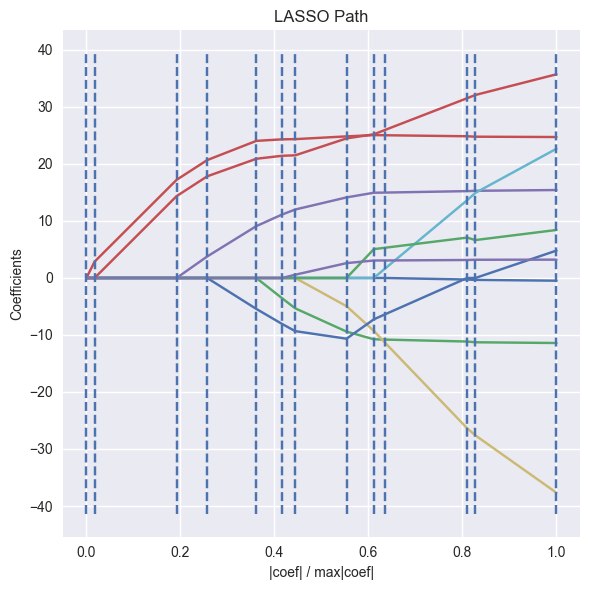

In [1]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入循环工具
from itertools import cycle
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入lasso系数路径
from sklearn.linear_model import lars_path
# 导入糖尿病数据集
from sklearn.datasets import load_diabetes
# 导入标准化工具
from sklearn.preprocessing import StandardScaler
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
X, y = load_diabetes(return_X_y=True, as_frame=True)
# 对X进行标准化
X = StandardScaler().fit(X).transform(X)
print("Computing regularization path using the LARS ...")
_, _, coefs = lars_path(X, y, method="lasso", verbose=True)
# 对系数做一个scale
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
# 开始绘图
fig, ax = plt.subplots(figsize=(6,6), tight_layout=True)
# 绘制系数路径图
ax.plot(xx, coefs.T)
# 获取Y轴的最大，小值
ymin, ymax = ax.get_ylim()
# 绘制竖直线
ax.vlines(xx, ymin, ymax, linestyle="dashed")
ax.set_xlabel("|coef| / max|coef|")
ax.set_ylabel("Coefficients")
ax.set_title("LASSO Path")
plt.show()
fig.savefig("../codeimage/code21.pdf")
